In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
from pylab import rcParams

In [3]:
data = pd.read_csv("Student_Performance.csv")

In [5]:
data

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85
5,6,Olivia,Female,95,30,88,1,High,90
6,7,Daniel,Male,70,8,60,0,Low,62
7,8,Sophia,Female,85,17,77,1,Medium,78
8,9,James,Male,82,12,70,2,Low,72
9,10,Isabella,Female,91,22,86,3,High,88


In [6]:
data.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85


In [7]:
data.tail()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
5,6,Olivia,Female,95,30,88,1,High,90
6,7,Daniel,Male,70,8,60,0,Low,62
7,8,Sophia,Female,85,17,77,1,Medium,78
8,9,James,Male,82,12,70,2,Low,72
9,10,Isabella,Female,91,22,86,3,High,88


In [8]:
data.shape

(10, 9)

In [9]:
data.index

RangeIndex(start=0, stop=10, step=1)

In [10]:
data.columns

Index(['StudentID', 'Name', 'Gender', 'AttendanceRate', 'StudyHoursPerWeek',
       'PreviousGrade', 'ExtracurricularActivities', 'ParentalSupport',
       'FinalGrade'],
      dtype='object')

In [12]:
specific_columns = ["High"]
data[data["ParentalSupport"].isin(specific_columns)]

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
3,4,Michael,Male,92,25,90,3,High,92
5,6,Olivia,Female,95,30,88,1,High,90
9,10,Isabella,Female,91,22,86,3,High,88


In [13]:
data[data["Gender"].str.contains("Male")]

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
6,7,Daniel,Male,70,8,60,0,Low,62
8,9,James,Male,82,12,70,2,Low,72


In [14]:
data[data["ParentalSupport"].str.contains("Low")]

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
2,3,Alex,Male,78,10,65,0,Low,68
6,7,Daniel,Male,70,8,60,0,Low,62
8,9,James,Male,82,12,70,2,Low,72


In [15]:
specific_columns = ["Low"]
data[data["ParentalSupport"].isin(specific_columns)]

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
2,3,Alex,Male,78,10,65,0,Low,68
6,7,Daniel,Male,70,8,60,0,Low,62
8,9,James,Male,82,12,70,2,Low,72


In [16]:
data[data["Name"].str.contains("Daniel")]

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
6,7,Daniel,Male,70,8,60,0,Low,62


In [17]:
Specific_column = ["Female"]
data[data["Gender"].isin(Specific_column)]

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
1,2,Sarah,Female,90,20,85,2,Medium,87
4,5,Emma,Female,88,18,82,2,Medium,85
5,6,Olivia,Female,95,30,88,1,High,90
7,8,Sophia,Female,85,17,77,1,Medium,78
9,10,Isabella,Female,91,22,86,3,High,88


In [18]:
data[(data["AttendanceRate"]>=50)]

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85
5,6,Olivia,Female,95,30,88,1,High,90
6,7,Daniel,Male,70,8,60,0,Low,62
7,8,Sophia,Female,85,17,77,1,Medium,78
8,9,James,Male,82,12,70,2,Low,72
9,10,Isabella,Female,91,22,86,3,High,88


In [19]:
data.isna().sum()

StudentID                    0
Name                         0
Gender                       0
AttendanceRate               0
StudyHoursPerWeek            0
PreviousGrade                0
ExtracurricularActivities    0
ParentalSupport              0
FinalGrade                   0
dtype: int64

In [20]:
data.describe()

,StudentID,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,85.600000,17.700000,78.100000,1.500000,80.200000
std,3.02765,7.441625,6.848357,10.170218,1.080123,10.097304
min,1.00000,70.000000,8.000000,60.000000,0.000000,62.000000
25%,3.25000,82.750000,12.750000,71.750000,1.000000,73.500000
50%,5.50000,86.500000,17.500000,80.000000,1.500000,82.500000
75%,7.75000,90.750000,21.500000,85.750000,2.000000,87.750000
max,10.00000,95.000000,30.000000,90.000000,3.000000,92.000000


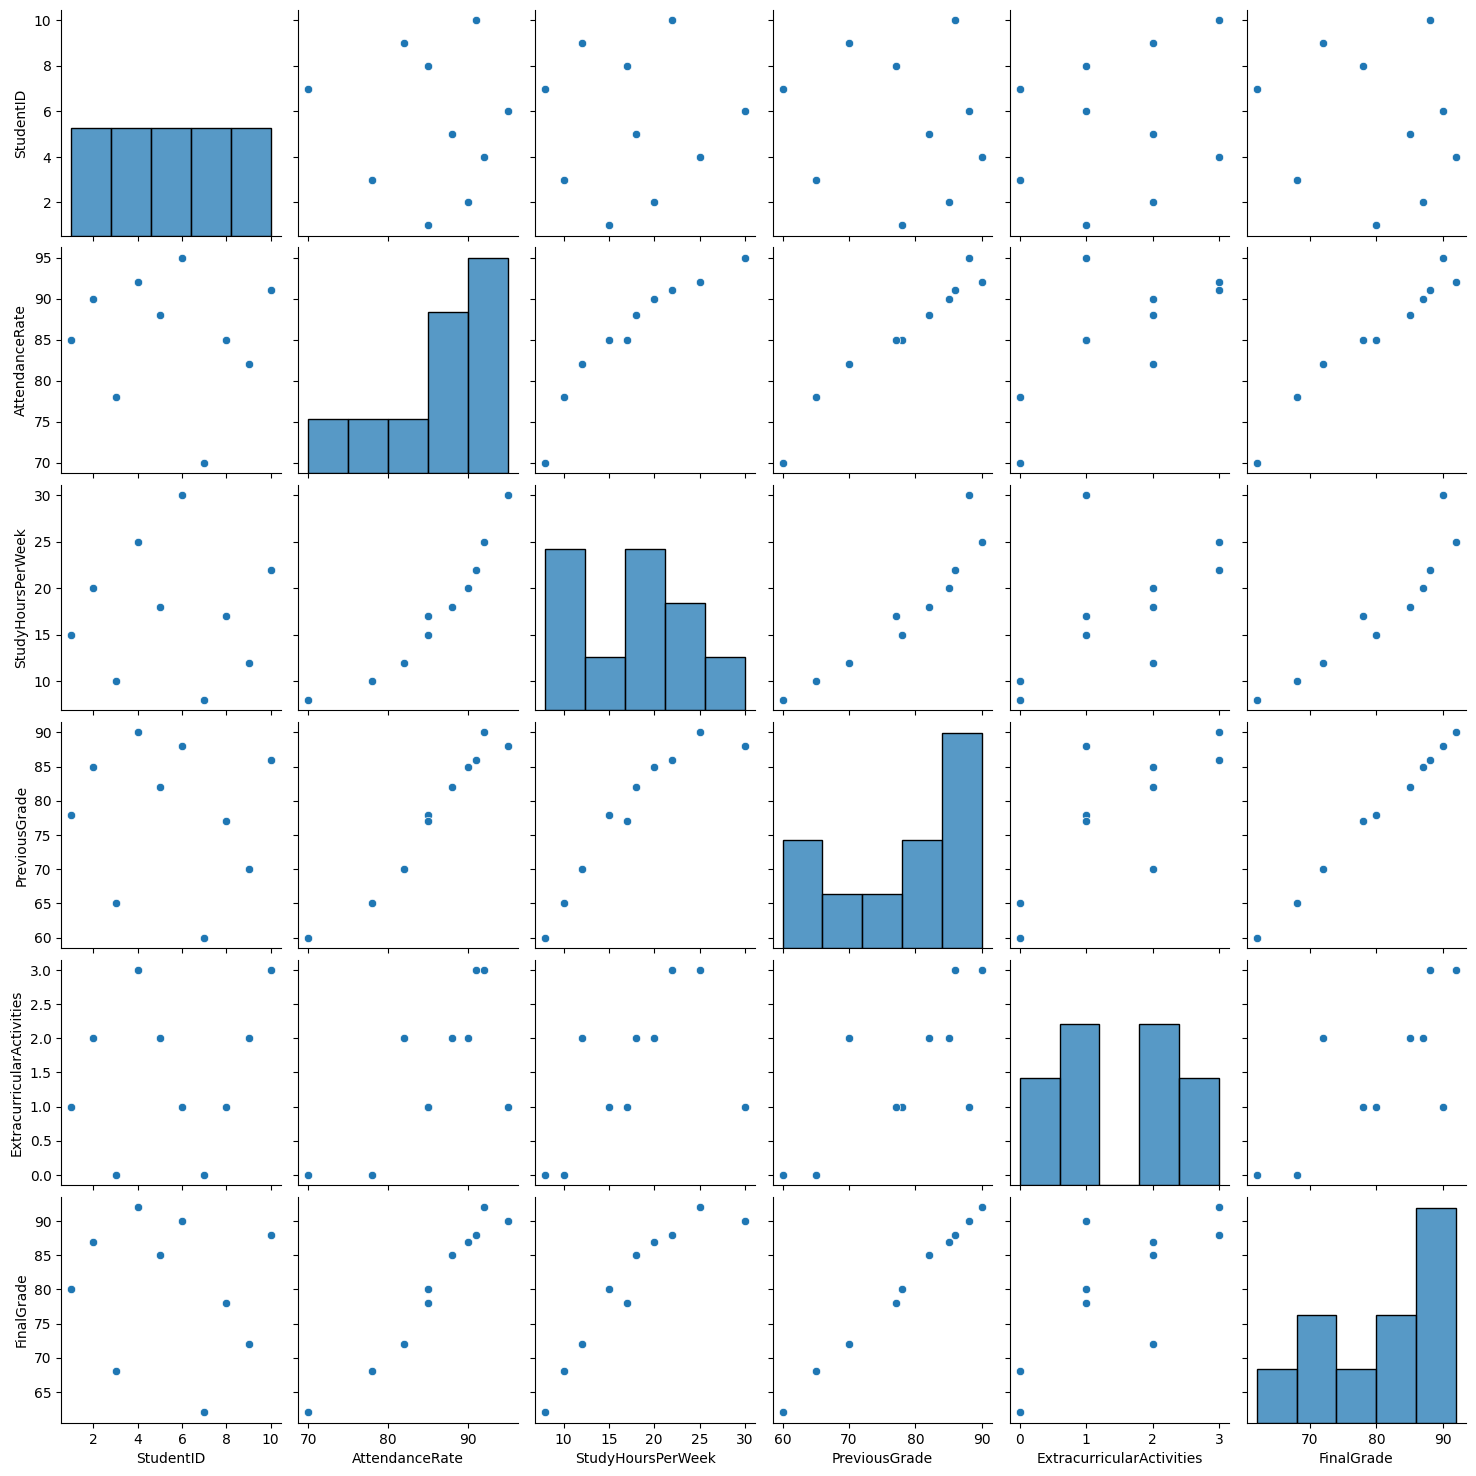

In [22]:
sns.pairplot(data)

<Axes: xlabel='AttendanceRate', ylabel='count'>

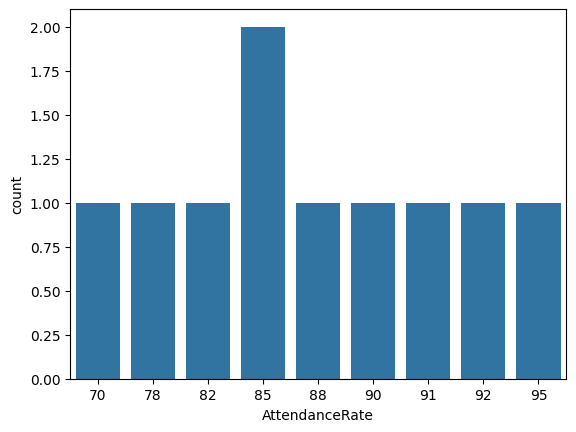

In [23]:
sns.countplot(data= data, x = "AttendanceRate")

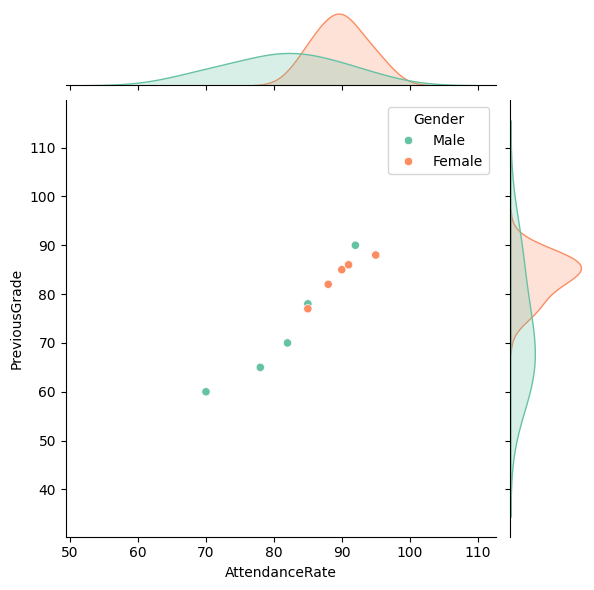

In [24]:
sns.jointplot(data, x = "AttendanceRate", y = "PreviousGrade", kind = "scatter", hue = "Gender", palette = "Set2")

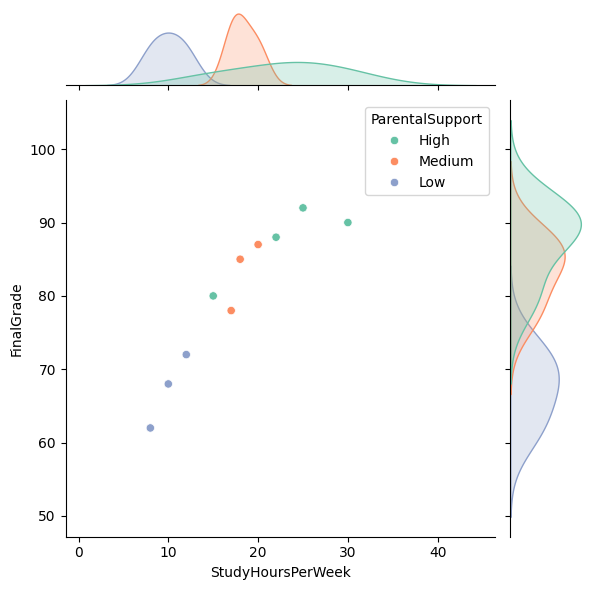

In [25]:
sns.jointplot(data, x = "StudyHoursPerWeek", y = "FinalGrade", kind= "scatter", hue = "ParentalSupport", palette='Set2' )

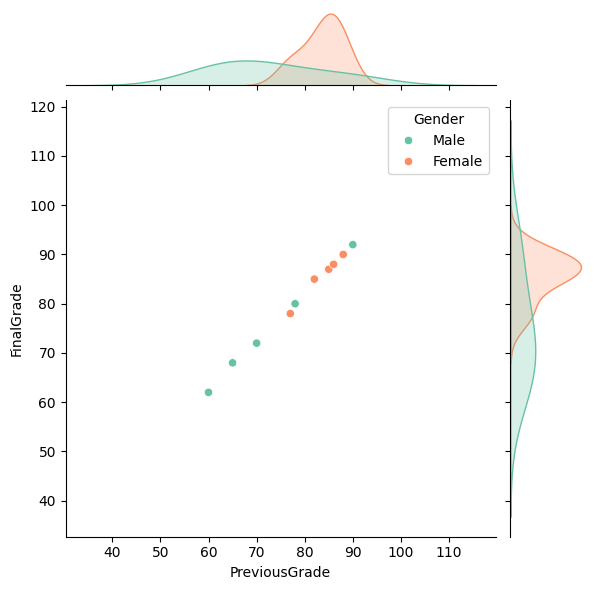

In [26]:
sns.jointplot(data, x = "PreviousGrade", y ="FinalGrade", kind = "scatter", hue = "Gender", palette = "Set2")

In [29]:
data.columns

Index(['StudentID', 'Name', 'Gender', 'AttendanceRate', 'StudyHoursPerWeek',
       'PreviousGrade', 'ExtracurricularActivities', 'ParentalSupport',
       'FinalGrade'],
      dtype='object')

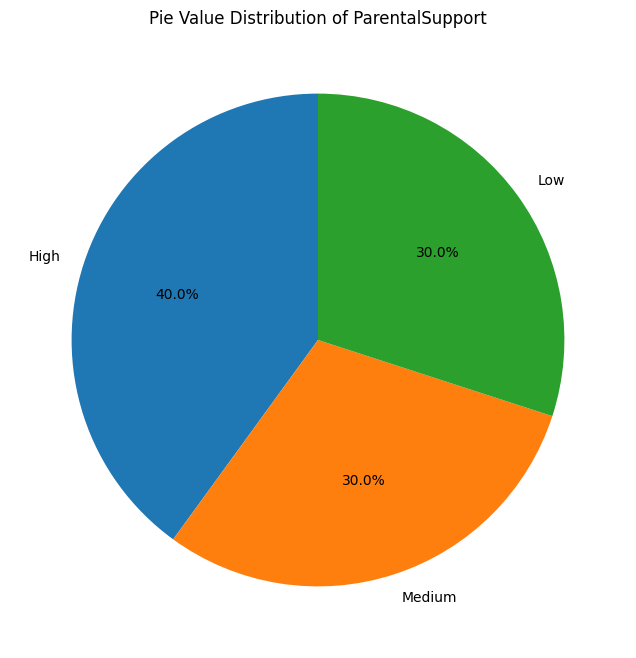

In [30]:
plt.figure(figsize = (12,8))
ParentalSuport_Condition = data["ParentalSupport"].value_counts()
plt.pie(ParentalSuport_Condition, labels = ParentalSuport_Condition.index, autopct = "%1.1f%%", startangle = 90)
plt.title("Pie Value Distribution of ParentalSupport")
plt.show()

In [31]:
filter_data = data[(data["PreviousGrade"]>50)]
filter_data

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85
5,6,Olivia,Female,95,30,88,1,High,90
6,7,Daniel,Male,70,8,60,0,Low,62
7,8,Sophia,Female,85,17,77,1,Medium,78
8,9,James,Male,82,12,70,2,Low,72
9,10,Isabella,Female,91,22,86,3,High,88


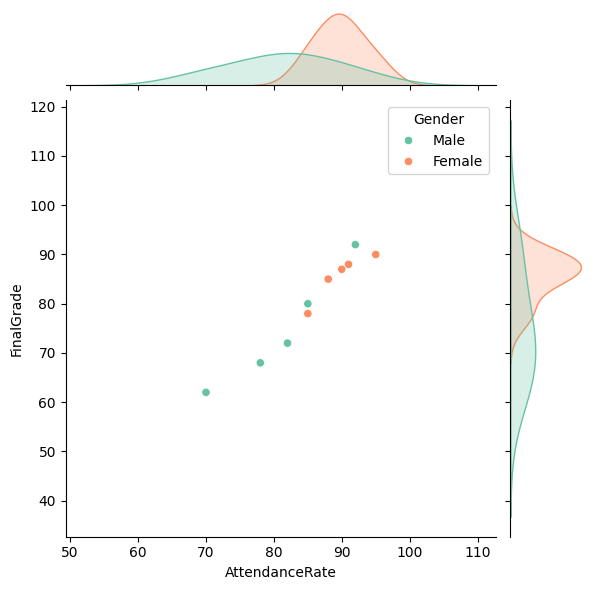

In [32]:
sns.jointplot(filter_data, x = "AttendanceRate", y = "FinalGrade", kind = "scatter", hue = "Gender", palette = "Set2")

In [33]:
df = data.iloc[:,1:]

In [34]:
df

,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,John,Male,85,15,78,1,High,80
1,Sarah,Female,90,20,85,2,Medium,87
2,Alex,Male,78,10,65,0,Low,68
3,Michael,Male,92,25,90,3,High,92
4,Emma,Female,88,18,82,2,Medium,85
5,Olivia,Female,95,30,88,1,High,90
6,Daniel,Male,70,8,60,0,Low,62
7,Sophia,Female,85,17,77,1,Medium,78
8,James,Male,82,12,70,2,Low,72
9,Isabella,Female,91,22,86,3,High,88


In [35]:
df["Name"].unique()

array(['John', 'Sarah', 'Alex', 'Michael', 'Emma', 'Olivia', 'Daniel',
       'Sophia', 'James', 'Isabella'], dtype=object)

In [36]:
df[df["Name"].str.contains("Alex")]

,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
2,Alex,Male,78,10,65,0,Low,68


In [37]:
data["Name"].index

RangeIndex(start=0, stop=10, step=1)

In [55]:
df["Name"] = df["Name"].replace(["John", "Sarah", "Alex", "Michael","Emma", "Olivia", "Daniel", "Sophia", "James", "Isabella"],[0, 1,2,3,4,5,6,7,8,9])

In [56]:
df

,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,Male,85,15,78,1,High,80
1,2,Female,90,20,85,2,Medium,87
2,3,Male,78,10,65,0,Low,68
3,4,Male,92,25,90,3,High,92
4,5,Female,88,18,82,2,Medium,85
5,6,Female,95,30,88,1,High,90
6,7,Male,70,8,60,0,Low,62
7,0,Female,85,17,77,1,Medium,78
8,8,Male,82,12,70,2,Low,72
9,9,Female,91,22,86,3,High,88


In [57]:
df["Gender"].value_counts()

Gender
Male      5
Female    5
Name: count, dtype: int64

In [58]:
df["Gender"] = df["Gender"].replace(["Male", "Female"], [0,1])

C:\Users\USER\AppData\Local\Temp\ipykernel_6232\3590087268.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"] = df["Gender"].replace(["Male", "Female"], [0,1])


In [59]:
df["Gender"]

0    0
1    1
2    0
3    0
4    1
5    1
6    0
7    1
8    0
9    1
Name: Gender, dtype: int64

In [60]:
df["ParentalSupport"].value_counts()

ParentalSupport
High      4
Medium    3
Low       3
Name: count, dtype: int64

In [61]:
df["ParentalSupport"] = df["ParentalSupport"].replace(["High", "Medium","Low"], [0,1, 2])

C:\Users\USER\AppData\Local\Temp\ipykernel_6232\3684246480.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["ParentalSupport"] = df["ParentalSupport"].replace(["High", "Medium","Low"], [0,1, 2])


In [62]:
df["ParentalSupport"]

0    0
1    1
2    2
3    0
4    1
5    0
6    2
7    1
8    2
9    0
Name: ParentalSupport, dtype: int64

In [63]:
df

,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,0,85,15,78,1,0,80
1,2,1,90,20,85,2,1,87
2,3,0,78,10,65,0,2,68
3,4,0,92,25,90,3,0,92
4,5,1,88,18,82,2,1,85
5,6,1,95,30,88,1,0,90
6,7,0,70,8,60,0,2,62
7,0,1,85,17,77,1,1,78
8,8,0,82,12,70,2,2,72
9,9,1,91,22,86,3,0,88


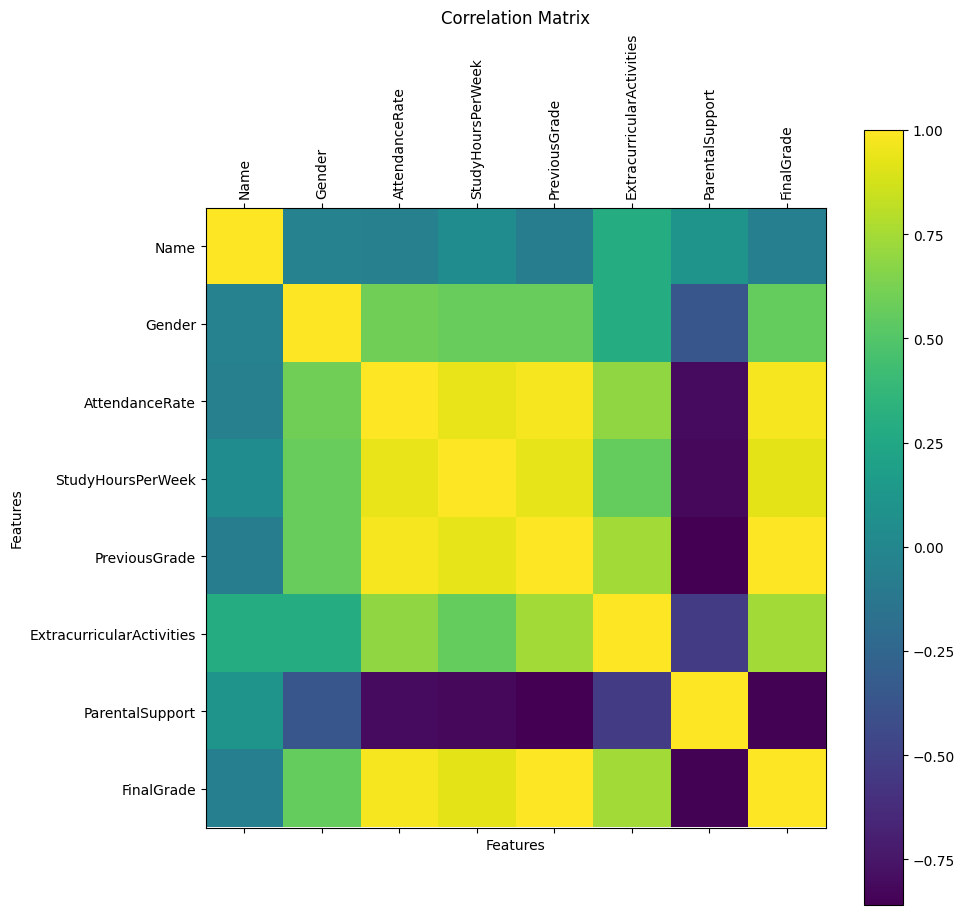

In [65]:
# Set the figure size
plt.rcParams["figure.figsize"] = (20, 10)

# Create the correlation matrix heatmap
plt.matshow(df.corr())

# Set the tick labels
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns, rotation=90)

# Add a colorbar
plt.colorbar()

# Set the title and axis labels
plt.title("Correlation Matrix")
plt.xlabel("Features")
plt.ylabel("Features")

# Show the plot
plt.show()

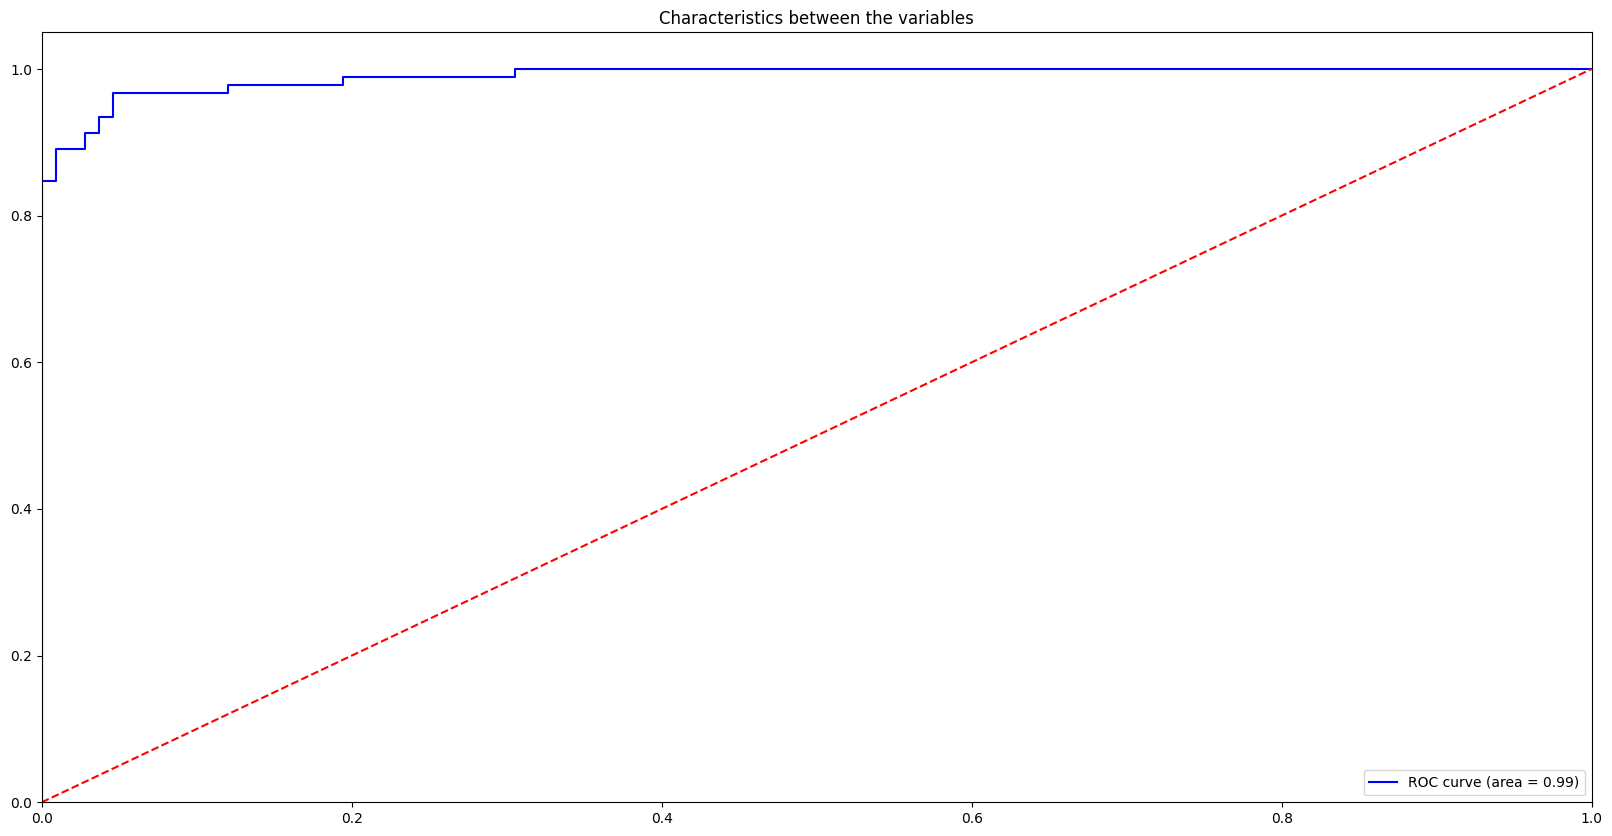

In [71]:
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
X, y = make_classification(n_samples = 1000, n_features = 20, random_state = 20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
y_scores = model.predict(X_test)
fpr, tpr, threshholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Characteristics between the variables')
plt.legend(loc='lower right')
plt.show()

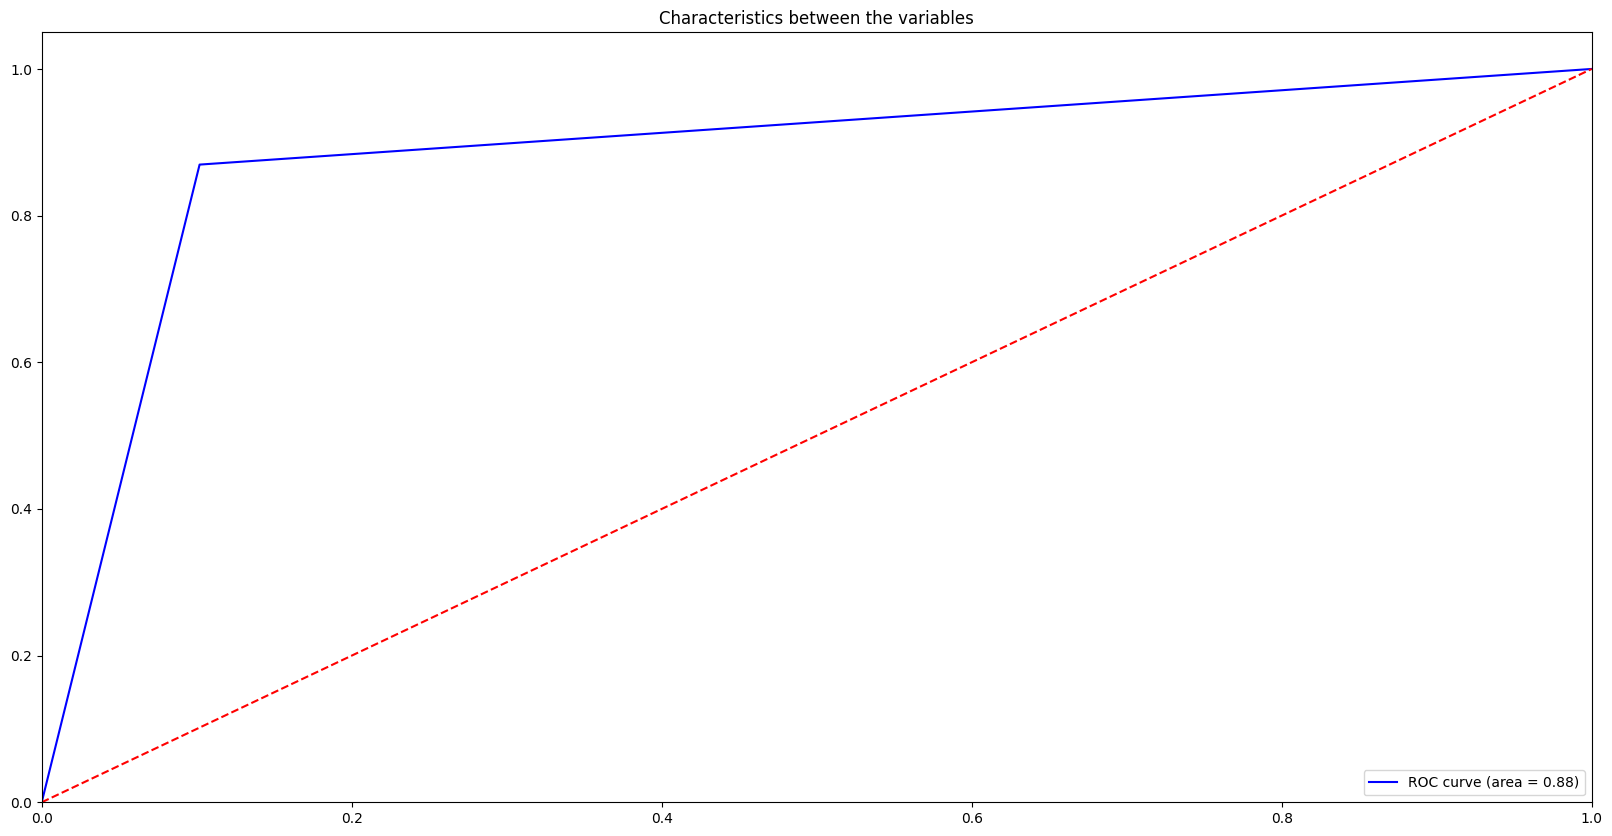

In [72]:
model = DecisionTreeRegressor()
model.fit(X_train,y_train)
y_scores = model.predict(X_test)
fpr, tpr, threshholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Characteristics between the variables')
plt.legend(loc='lower right')
plt.show()

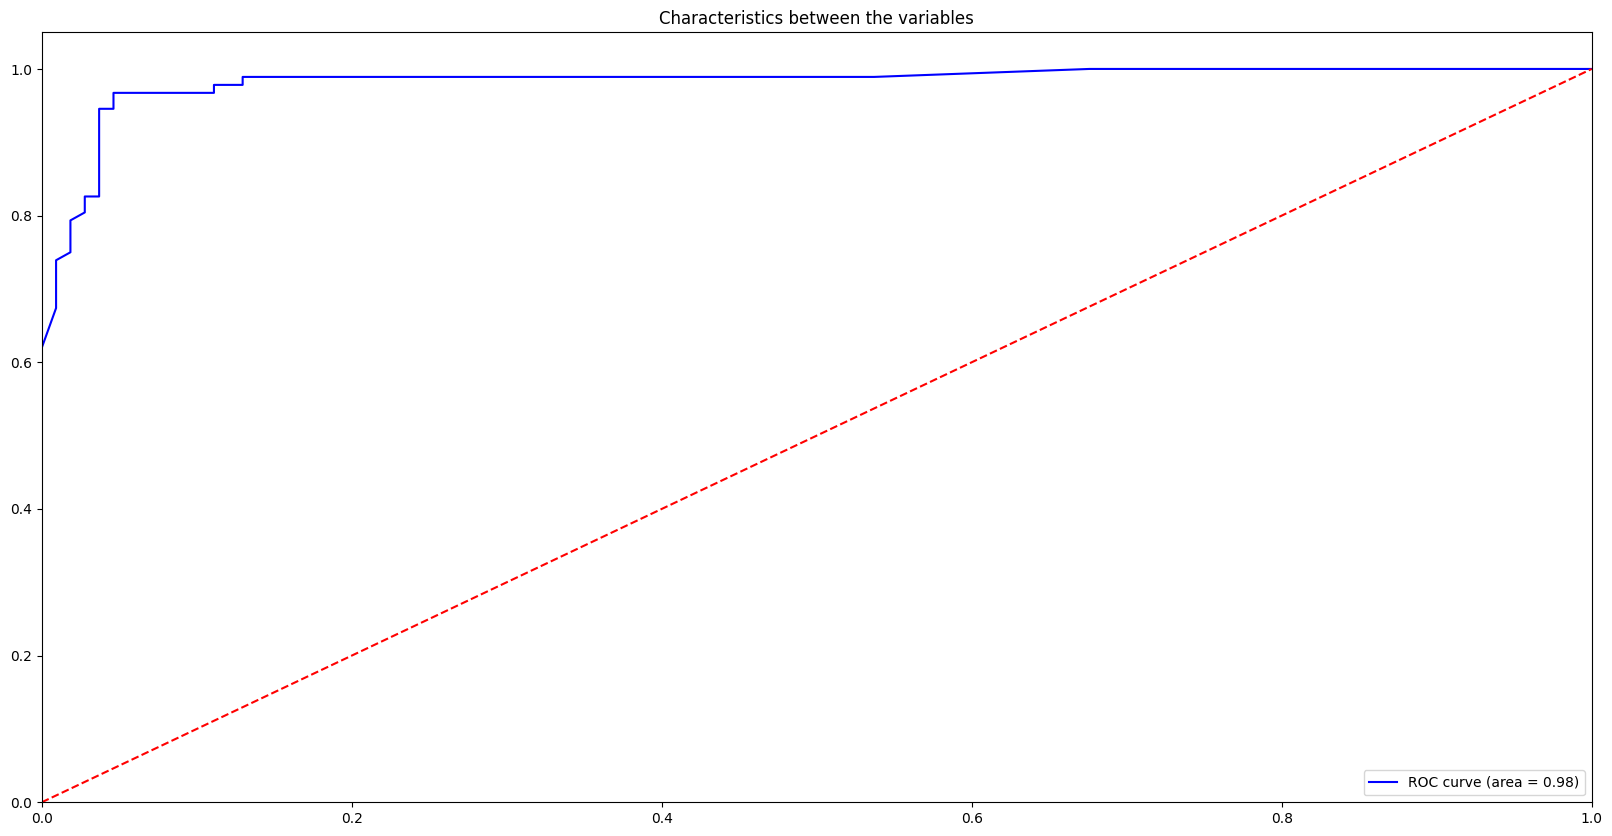

In [74]:
model = RandomForestRegressor()
model.fit(X_train,y_train)
y_scores = model.predict(X_test)
fpr, tpr, threshholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Characteristics between the variables')
plt.legend(loc='lower right')
plt.show()

In [79]:
best_model = LinearRegression()
best_model.fit(X_train,y_train)

LinearRegression()

In [84]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X = df.drop(columns=['FinalGrade'])
y = df['FinalGrade'].to_numpy().reshape(-1,1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
X_train = x_scaler.fit_transform(X_train)
y_train = y_scaler.fit_transform(y_train)
X_test = x_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)
model = [LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor()]
models = ['Linear Regression','Decision Tree','Random Forest']
for i, x in enumerate(model):
    train = x.fit(X_train,y_train)
    train_test = x.predict(X_test)
    print("Model for", models[i])
    print("MAE: ",np.round(mean_absolute_error(y_test, train_test),5),"%")
    print("MAE: ",np.round(mean_squared_error(y_test, train_test),5),"%")
    print("MAE: ",np.round(np.sqrt(mean_absolute_error(y_test, train_test)),5),"%")
    print("MAE: ",np.round(r2_score(y_test, train_test),5),"%")

Model for Linear Regression
MAE:  0.03909 %
MAE:  0.00178 %
MAE:  0.19772 %
MAE:  0.97157 %
Model for Decision Tree
MAE:  0.1 %
MAE:  0.01111 %
MAE:  0.31623 %
MAE:  0.82222 %


C:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model for Random Forest
MAE:  0.105 %
MAE:  0.01104 %
MAE:  0.32404 %
MAE:  0.8233 %


In [ ]:
# Assuming these are your features:
gender = int(input("Gender (0 for female, 1 for male): "))  # Example: binary encoding
Attendance_rate = float(input("Attendance Rate: "))
StudyHoursPerWeek = float(input("Study Hours Per Week: "))
Previousgrade = float(input("Previous Grade: "))
ExtracurricularActivities = int(input("Extracurricular Activities (0 or 1): "))
Parentalsupport = int(input("Parental Support: "))

# Ensure you have all 7 features here
z = np.array([[gender, Attendance_rate, StudyHoursPerWeek, Previousgrade, ExtracurricularActivities, Parentalsupport]])

# If you had another feature (e.g., 'feature_7'), add it here
# z = np.array([[gender, Attendance_rate, StudyHoursPerWeek, Previousgrade, ExtracurricularActivities, Parentalsupport, feature_7]])

Gender (0 for female, 1 for male):  0
Attendance Rate:  2
Study Hours Per Week:  90
Previous Grade:  7
